### This notebook splits large sized train dataset into smaller patches with overlapping

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [58]:
import cv2

# Thanks to https://github.com/Devyanshu/image-split-with-overlap/tree/master

def split_image_from_path(path_to_img, name, channels=3):
    if channels == 3:
        format_ = cv2.IMREAD_COLOR
    elif channels == 1:
        format_ = cv2.IMREAD_GRAYSCALE
    
    img = cv2.imread(path_to_img, format_)
    
    img_h, img_w, *_ = img.shape
    split_width = 512
    split_height = 512


    def start_points(size, split_size, overlap=0):
        points = [0]
        stride = int(split_size * (1-overlap))
        counter = 1
        while True:
            pt = stride * counter
            if pt + split_size >= size:
                if split_size == size:
                    break
                points.append(size - split_size)
                break
            else:
                points.append(pt)
            counter += 1
        return points


    X_points = start_points(img_w, split_width, 0.5)
    Y_points = start_points(img_h, split_height, 0.5)

    frmt = 'png'

    for ii, i in enumerate(Y_points):
        for jj, j in enumerate(X_points):
            split = img[i:i+split_height, j:j+split_width]
            
            cv2.imwrite(f'{name}_{ii:03d}_{jj:03d}.{frmt}', split)

In [59]:
for i in tqdm(range(21)):
    file_path = f"train_updated_titiles/images/train_image_{i:03d}.png"
    split_image_from_path(file_path, f"patches/images/{i:03d}")

  0%|          | 0/21 [00:00<?, ?it/s]

In [64]:
for i in tqdm(range(21)):
    file_path = f"train_updated_titiles/masks/train_mask_{i:03d}.png"
    split_image_from_path(file_path, f"patches/masks/{i:03d}", channels=1)

  0%|          | 0/21 [00:00<?, ?it/s]

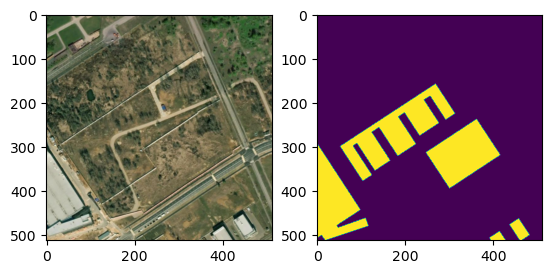

In [66]:
image = plt.imread('patches/images/000_004_010.png')
mask = plt.imread('patches/masks/000_004_010.png')

f, ax = plt.subplots(1, 2)
ax[0].imshow(image)
ax[1].imshow(mask)

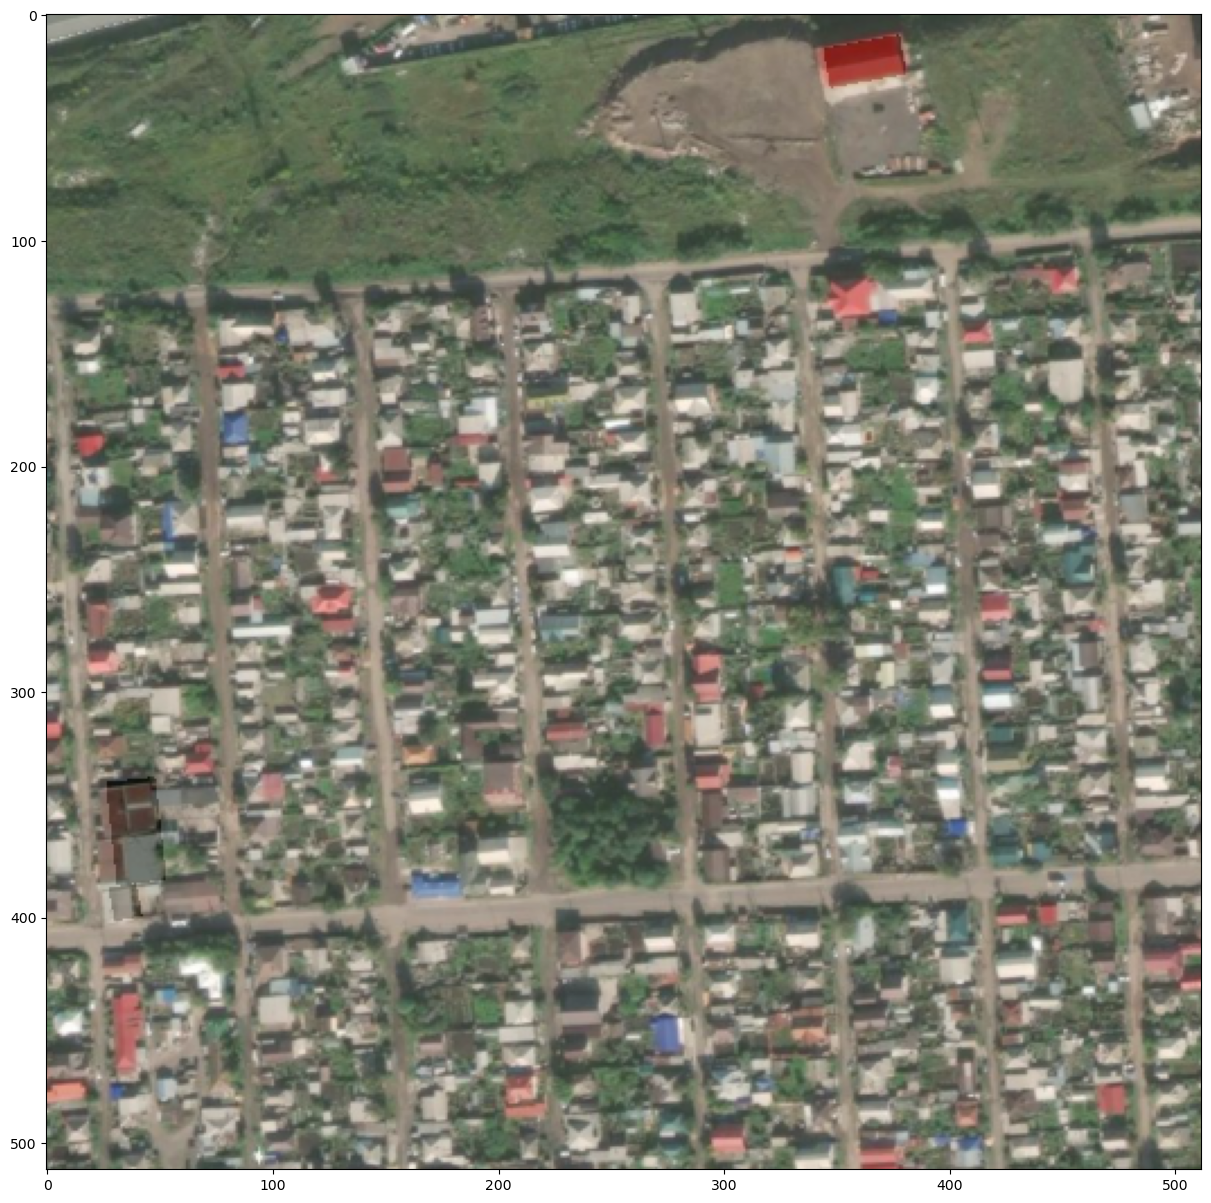

In [85]:
n = np.random.randint(0, 20)
h = np.random.randint(5, 15)
w = np.random.randint(5, 15)

image = plt.imread(f"patches/images/{n:03d}_{h:03d}_{w:03d}.png")
mask = plt.imread(f"patches/masks/{n:03d}_{h:03d}_{w:03d}.png")


fig = plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.imshow(mask, 'binary', alpha=0.2)
